
# Telco Customer Churn Prediction
## By Upeksha And Rajnandini
This end-to-end machine learning project aims to predict customer churn based on demographics, services, and billing data.

We'll walk through data analysis, preprocessing, model building, evaluation, and comparison across multiple ML models.

# Obtain Data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import itertools
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
#import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [2]:
## To display  all the interactive output without using the print function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data=pd.read_csv('Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print("Dataset shape:", data.shape)

Dataset shape: (7043, 21)


In [5]:
list(data.columns.tolist())

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [6]:
# Checking out columns' (names,types,any missing value)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


###### We have 21 columns. Three columns are numeric. One of them is float and the other two are integer. There are 18 object columns. The number of rows represents the number of customers of Telco and they are 7043 customers. There is no missing data

### Scrub Data

 ##### Check dublicates
check if we have any  duplication  

In [7]:
data.duplicated().any()

False

In [8]:
# checking missing values
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# lowercase column name
data.columns = map(str.lower, data.columns)
data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [10]:


# customerid not useful better to drop it
data.drop(['customerid'], axis=1, inplace=True)

In [11]:
data['totalcharges'].unique()
#Replacing spaces with null values in total charges column
data['totalcharges'] = data["totalcharges"].replace(" ",np.nan)
data.info()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [12]:
data.isna().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [13]:
data['totalcharges'].isna().sum()

11

In [14]:
print((data['totalcharges'].isna().sum()/len(data))*100) # count the percentage of missing data
#Dropping null values from total charges column which contain .15% missing data 
data.dropna(inplace=True)

0.1561834445548772


In [15]:
# checking missing data
data.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [16]:
#convert to float type
data["totalcharges"] = data["totalcharges"].astype(float)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   seniorcitizen     7032 non-null   int64  
 2   partner           7032 non-null   object 
 3   dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   phoneservice      7032 non-null   object 
 6   multiplelines     7032 non-null   object 
 7   internetservice   7032 non-null   object 
 8   onlinesecurity    7032 non-null   object 
 9   onlinebackup      7032 non-null   object 
 10  deviceprotection  7032 non-null   object 
 11  techsupport       7032 non-null   object 
 12  streamingtv       7032 non-null   object 
 13  streamingmovies   7032 non-null   object 
 14  contract          7032 non-null   object 
 15  paperlessbilling  7032 non-null   object 
 16  paymentmethod     7032 non-null   object 
 17  

In [18]:
data['onlinesecurity'].value_counts()
data['onlinebackup'].value_counts()
data['deviceprotection'].value_counts()
data['techsupport'].value_counts()
data['streamingtv'].value_counts()
data['streamingmovies'].value_counts()

onlinesecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

onlinebackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

deviceprotection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64

techsupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64

streamingtv
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64

streamingmovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64

In [19]:
#replace 'No internet service' to No for the following columns
replace_cols = [ 'onlinesecurity', 'onlinebackup', 'deviceprotection',
                'techsupport','streamingtv', 'streamingmovies']
for i in replace_cols : 
    data[i]  = data[i].replace({'No internet service' : 'No'})

In [20]:
data['onlinesecurity'].unique()
data['onlinesecurity'].value_counts()
data['onlinebackup'].value_counts()
data['deviceprotection'].value_counts()
data['techsupport'].value_counts()
data['streamingtv'].value_counts()
data['streamingmovies'].value_counts()

array(['No', 'Yes'], dtype=object)

onlinesecurity
No     5017
Yes    2015
Name: count, dtype: int64

onlinebackup
No     4607
Yes    2425
Name: count, dtype: int64

deviceprotection
No     4614
Yes    2418
Name: count, dtype: int64

techsupport
No     4992
Yes    2040
Name: count, dtype: int64

streamingtv
No     4329
Yes    2703
Name: count, dtype: int64

streamingmovies
No     4301
Yes    2731
Name: count, dtype: int64

In [21]:
# replacing values
data['seniorcitizen']=data['seniorcitizen'].replace({1:'Yes',0:"No"})
data['seniorcitizen'].value_counts()

seniorcitizen
No     5890
Yes    1142
Name: count, dtype: int64

### Explore Data

#### Explore Target Column

In [22]:

data['churn'].value_counts()


churn
No     5163
Yes    1869
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1e8d817b440>,
 [Text(-0.8895462594270229, -0.8054237718986146, 'not_churn'),
  Text(0.8154174044747715, 0.7383051242403962, 'yes_churn')],
 [Text(-0.5189019846657634, -0.46983053360752514, '73.4%'),
  Text(0.44477312971351174, 0.402711885949307, '26.6%')])

(-1.1778328642434504,
 1.1037060687204532,
 -1.1704699726562402,
 1.1033557129836304)

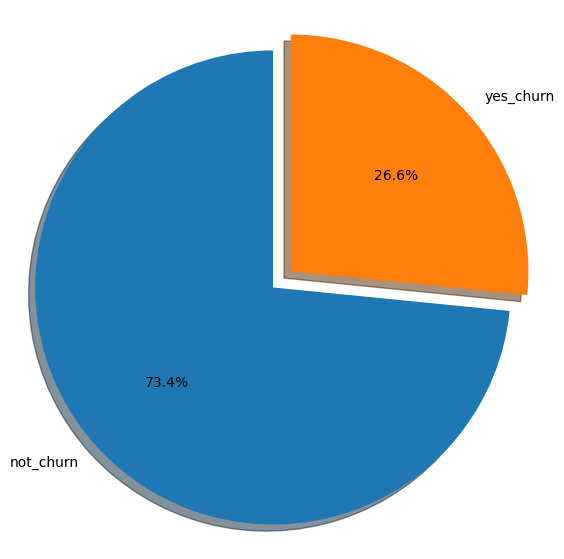

In [23]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.pie(data["churn"].value_counts(),labels=('not_churn','yes_churn'),explode = [0.1,0],autopct ='%1.1f%%' ,
        shadow = True,startangle = 90,labeldistance = 1.1)
plt.axis('equal')

plt.show()


######  When analyzing the target variable 'churn', it becomes evident that the dataset is imbalanced — around 73% of the entries are labeled as "No" (non-churn), while only about 27% are "Yes" (churn). This class imbalance can impact model performance and should be handled appropriately during model training using techniques such as resampling or algorithm-based solutions.

##### Exploring Categorical Features

In [24]:
def plot_cat(data, feature, xlabel_rotation=0):
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    
    # Title and labels
    ax[0].set(xlabel=feature, ylabel="Number of Customers")
    ax[1].set(xlabel=feature, ylabel="Number of Customers")
    
    # Bar plots
    data[data.churn == "No"][feature].value_counts().plot(
        kind='bar', ax=ax[0], rot=xlabel_rotation).set_title('Non-churn Customers')

    data[data.churn == "Yes"][feature].value_counts().plot(
        kind='bar', ax=ax[1], rot=xlabel_rotation).set_title('Churn Customers')
    
    # Main title
    fig.suptitle(f'{feature} Distribution in Customer Attrition', 
                 y=1.02, size=16, weight='bold')
    
    plt.tight_layout()
    plt.show()


In [25]:
# define features
categorical_features=['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
numerical_features=['tenure','monthlycharges', 'totalcharges']

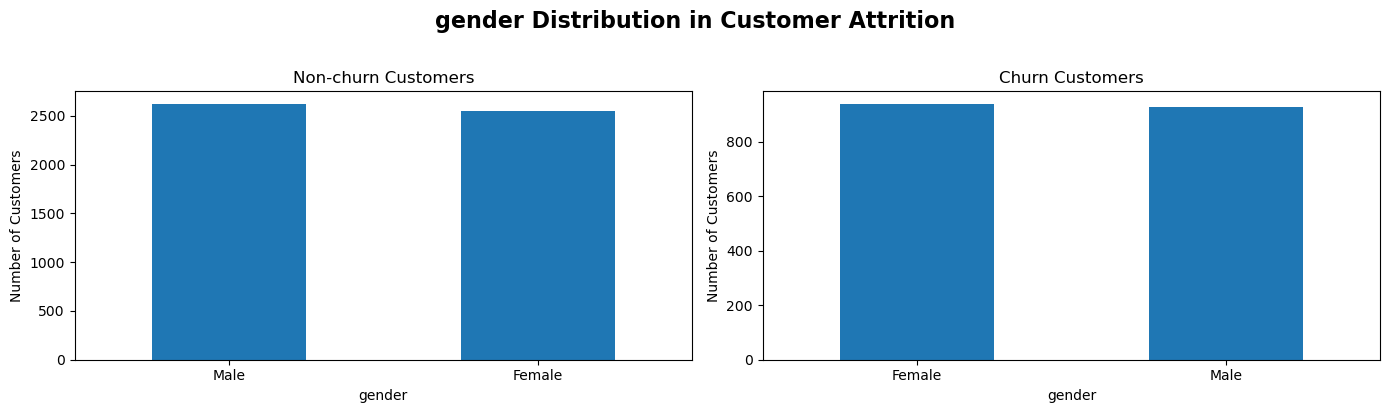

In [26]:
plot_cat(data,'gender')


 The distribution of male and female customers appears to be fairly balanced across both churn and non-churn categories. This suggests that gender may not be a significant factor influencing customer churn, and might have limited predictive power for our model.

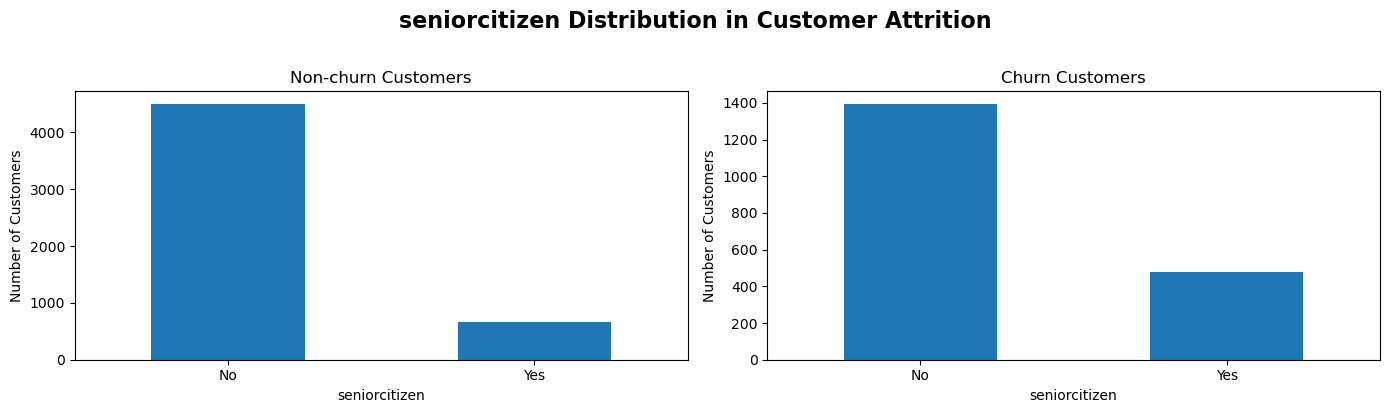

In [27]:
plot_cat(data,'seniorcitizen')

Although the number of senior citizens in the dataset is relatively small, a higher proportion of them seem to churn compared to younger customers. However, the churn plot also indicates that many younger individuals are churning as well. This suggests that the SeniorCitizen feature could hold some predictive value and may contribute meaningfully to churn prediction.



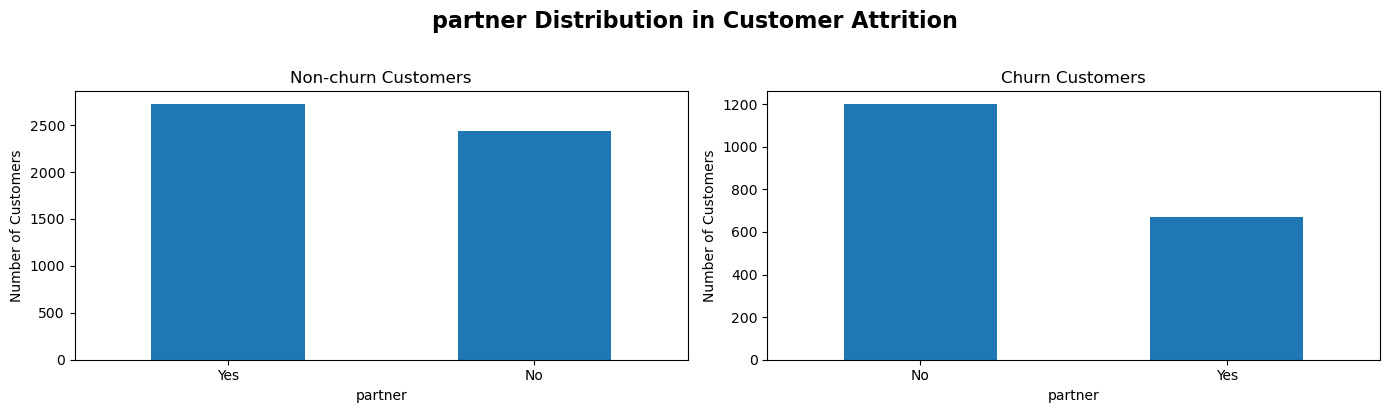

In [28]:
# partner 
plot_cat(data,'partner')


The churn distribution appears similar for customers with and without partners when it comes to non-churn cases. However, customers without a partner show a slightly higher tendency to churn. This indicates that the Partner feature could be relevant in predicting churn behavior.

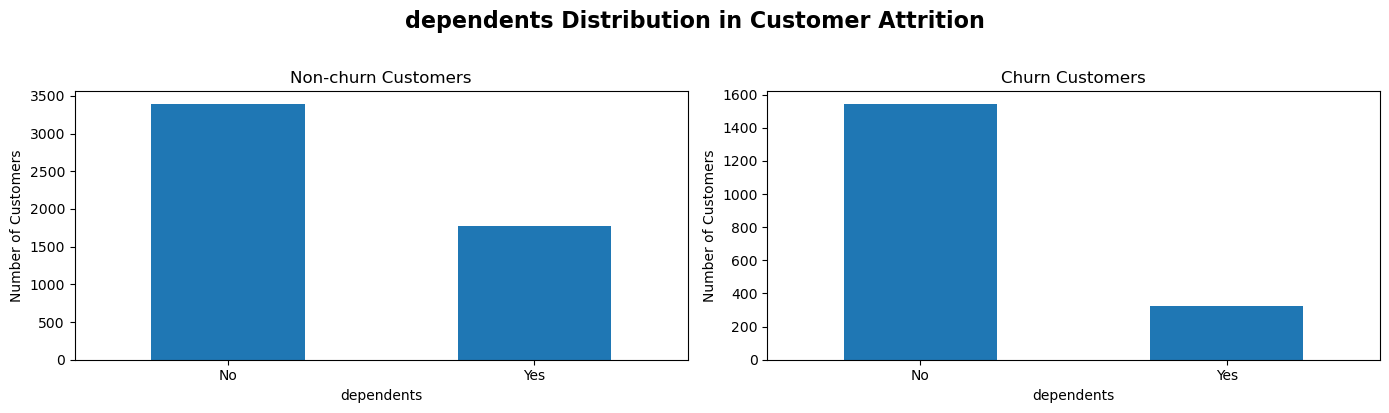

In [29]:
# dependents
plot_cat(data,'dependents')


The dataset shows that fewer customers have dependents, yet those without dependents exhibit a higher churn rate. This pattern suggests that the Dependents feature could play a meaningful role in predicting customer churn.



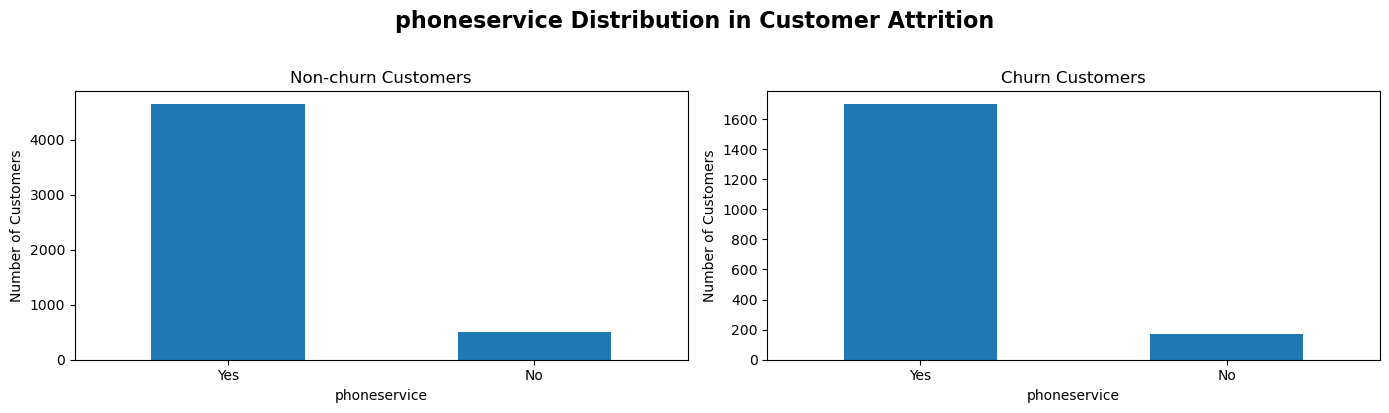

In [30]:
# phoneservice
plot_cat(data,'phoneservice')

A majority of customers have phone service, but the churn rate among those with and without phone service appears quite similar. This indicates that the PhoneService feature may not significantly influence churn prediction.

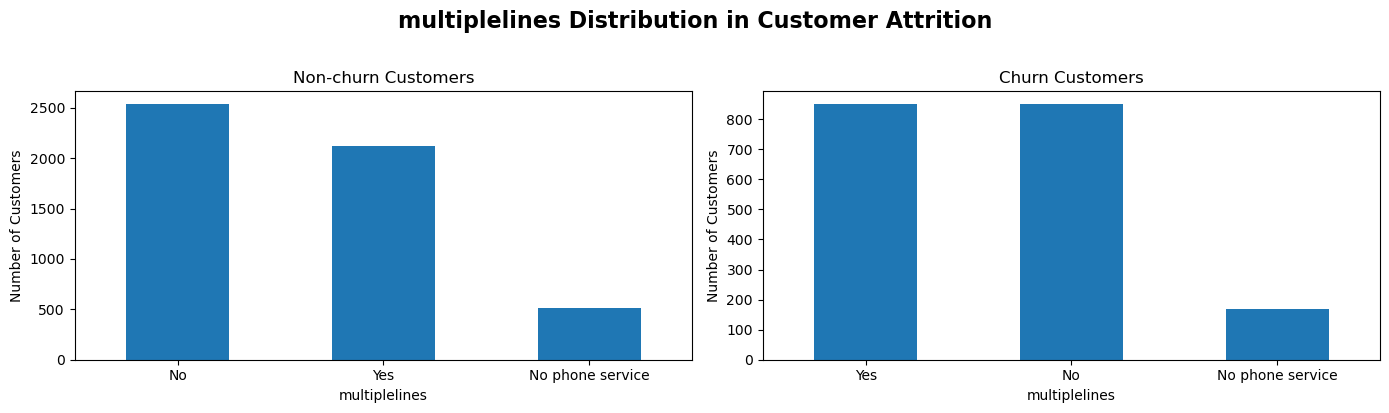

In [31]:
# multiplelines
plot_cat(data,'multiplelines')


The churn behavior is fairly consistent across customers with and without multiple lines. This suggests that the MultipleLines feature may not contribute much to distinguishing between churn and non-churn cases.

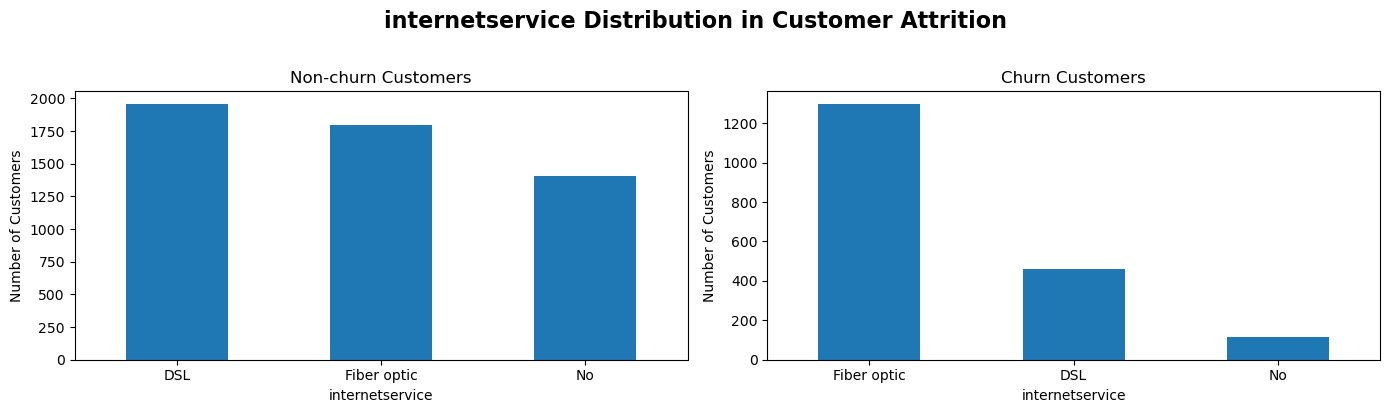

In [32]:
# internetservice
plot_cat(data,'internetservice')


Most customers in the dataset have some form of internet service, either DSL or Fiber Optic. Notably, a higher churn rate is observed among those using Fiber Optic connections. This indicates that the InternetService feature—particularly the type of connection—could be a strong predictor of customer churn.

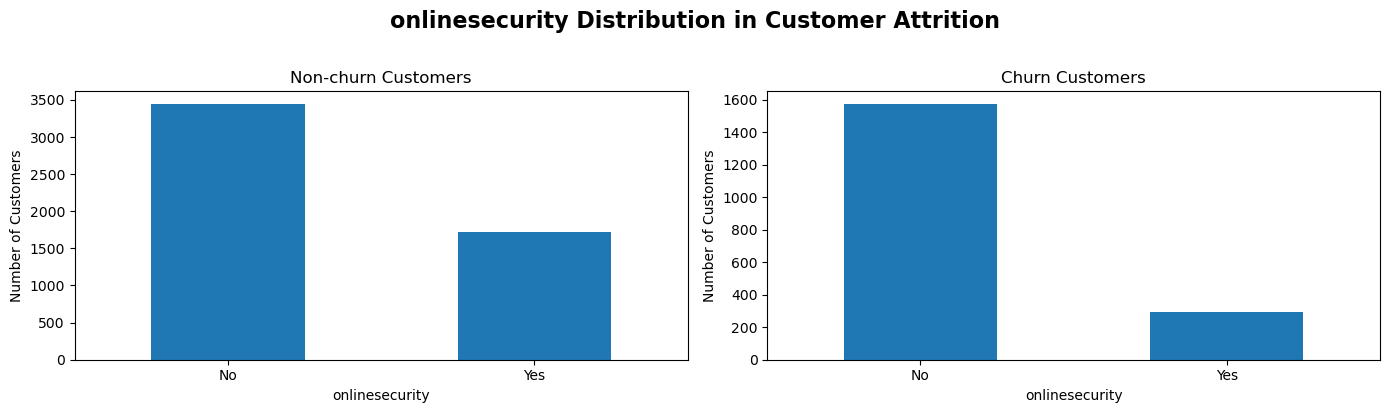

In [33]:
# plot_cat(df,'onlinesecurity')

plot_cat(data,'onlinesecurity')


A significant portion of customers do not have online security, and those who do are less likely to churn. This suggests that having online security is associated with customer retention, making OnlineSecurity a potentially important feature for predicting churn.

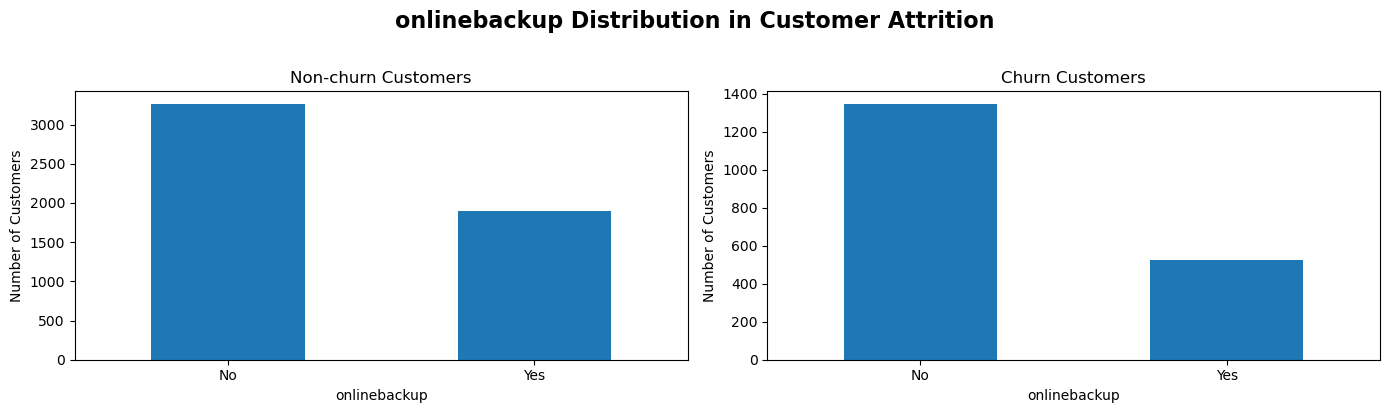

In [34]:
#onlinebackup
plot_cat(data,'onlinebackup')


The data shows that more customers do not have online backup services. However, those who do have OnlineBackup are less likely to churn. This indicates that offering backup services may help in customer retention, making this feature valuable for churn prediction.

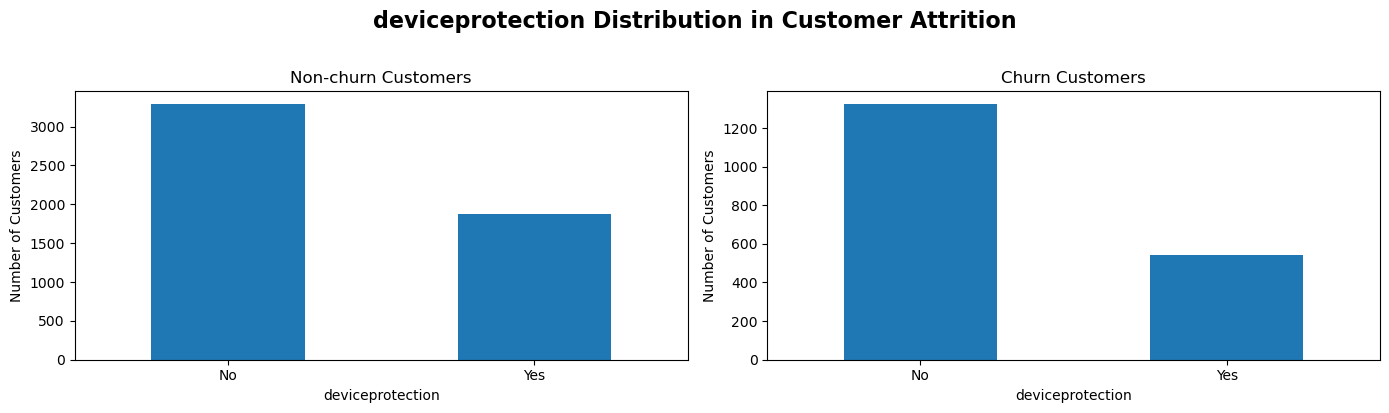

In [35]:
#deviceprotection
plot_cat(data,'deviceprotection')


A larger number of customers do not use device protection, but those who do are less likely to churn. This suggests that DeviceProtection may play a role in customer retention and could be a useful feature in predicting churn.



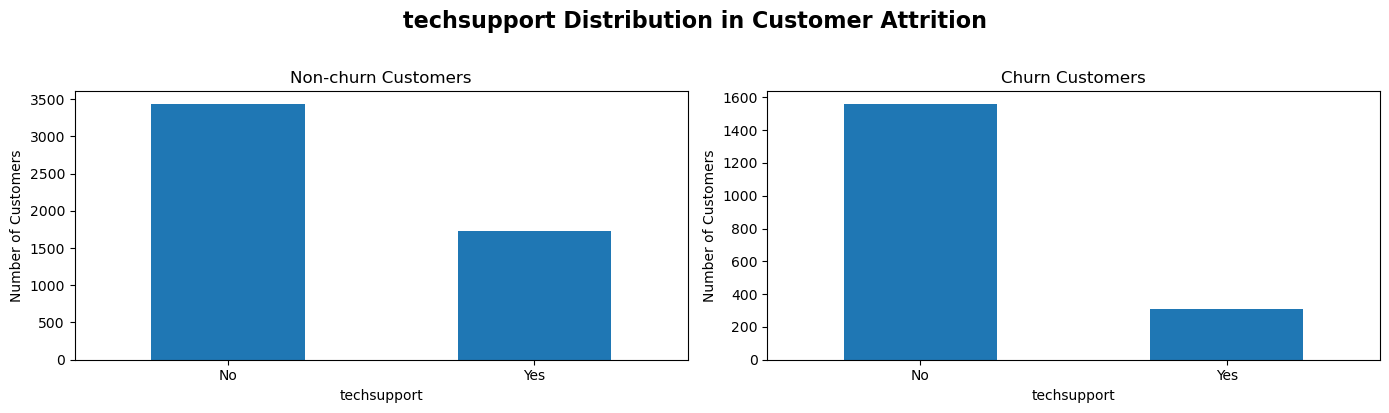

In [36]:
#techsupport
plot_cat(data,'techsupport')


The majority of customers lack tech support, yet those who do have it show a lower tendency to churn. This pattern suggests that the TechSupport feature could be an important factor in identifying customers at risk of leaving.

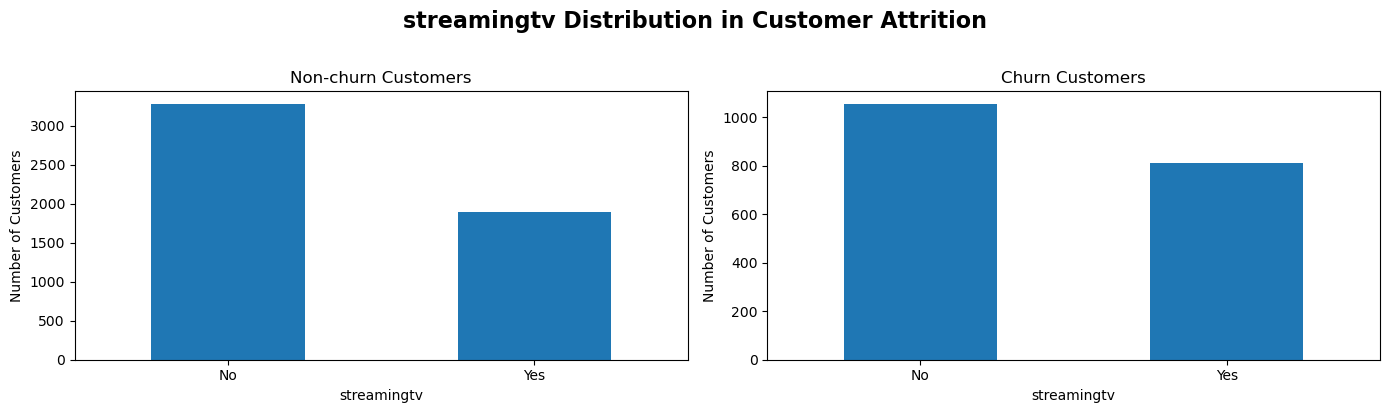

In [37]:
# streamingtv
plot_cat(data,'streamingtv')

The churn rates appear fairly similar for customers regardless of whether they use the StreamingTV service or not. This suggests that this feature may have limited impact on predicting customer churn.

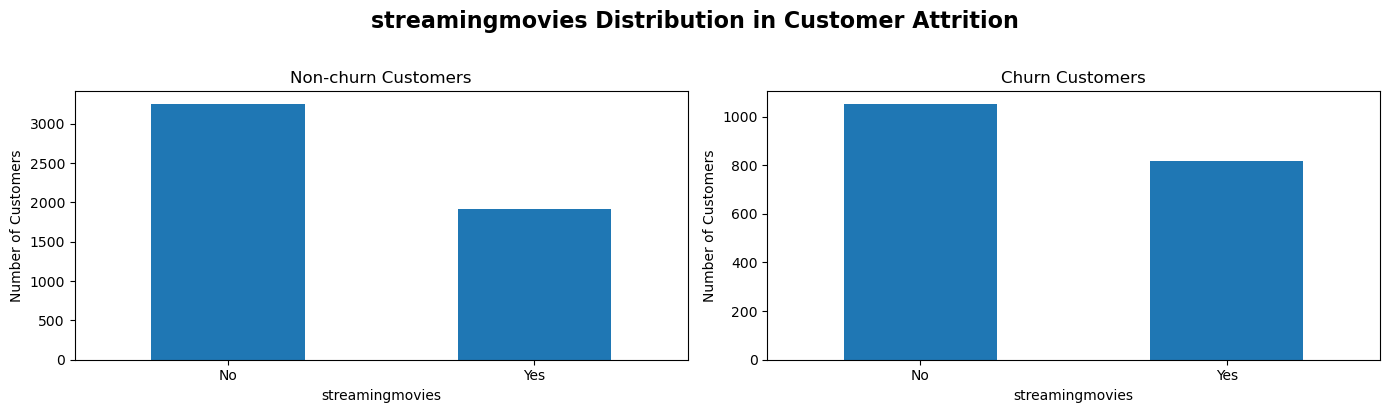

In [38]:
# streamingmovies
plot_cat(data,'streamingmovies')


While a larger number of customers do not use the StreamingMovies service, those who do appear to have a higher likelihood of churning. This indicates that this feature might be moderately relevant for predicting churn behavior.

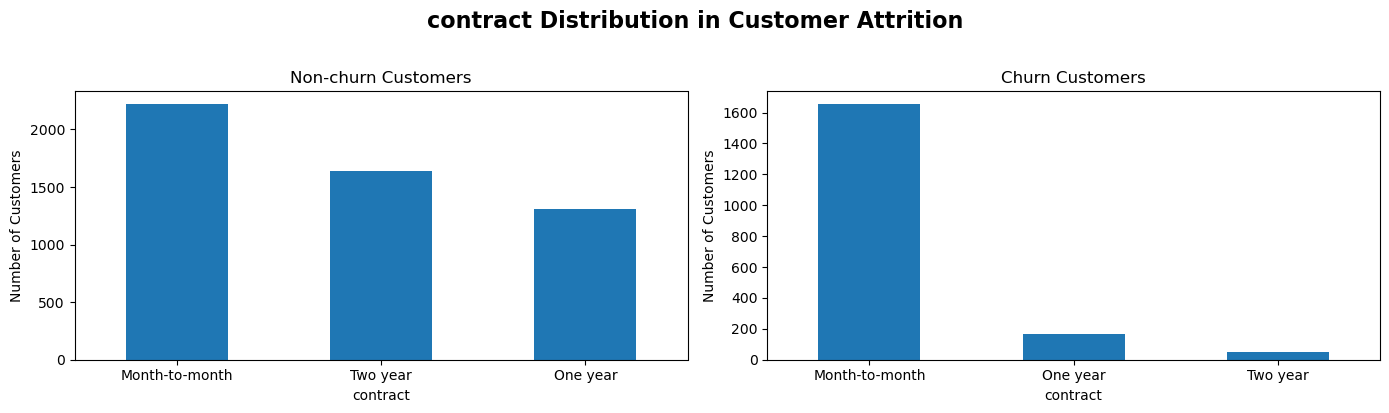

In [39]:
# contract
plot_cat(data,'contract')

The majority of customers are on month-to-month contracts, and this group shows the highest churn rate. In contrast, customers with one-year contracts churn less, and those with two-year contracts have the lowest churn rate. This strong inverse relationship between contract length and churn likelihood makes Contract one of the most influential features for prediction.

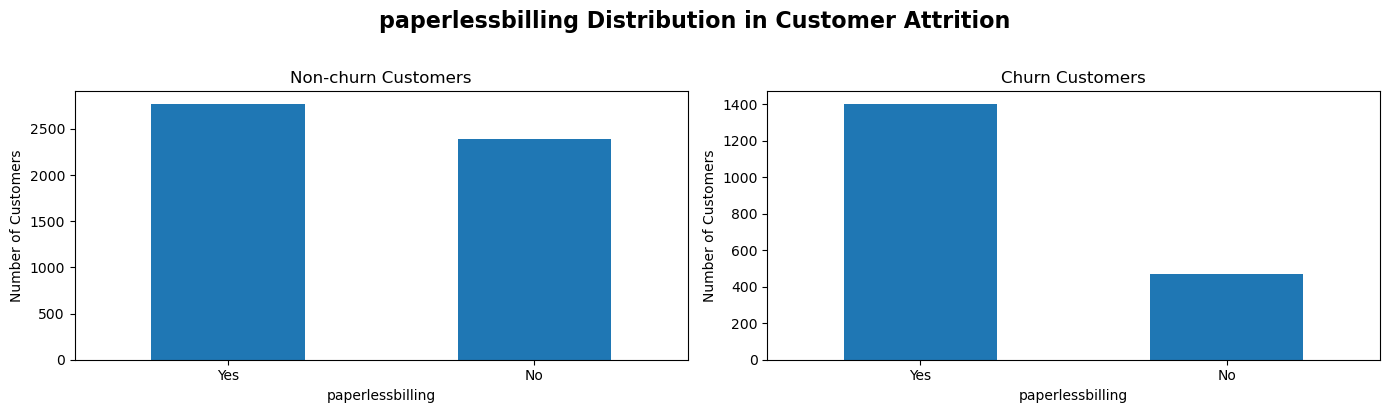

In [40]:
# paperlessbilling
plot_cat(data,'paperlessbilling')


A noticeably higher proportion of customers who use paperless billing have churned compared to those who don’t. This suggests that the PaperlessBilling feature could be associated with higher churn risk and may contribute to the model's predictive power.

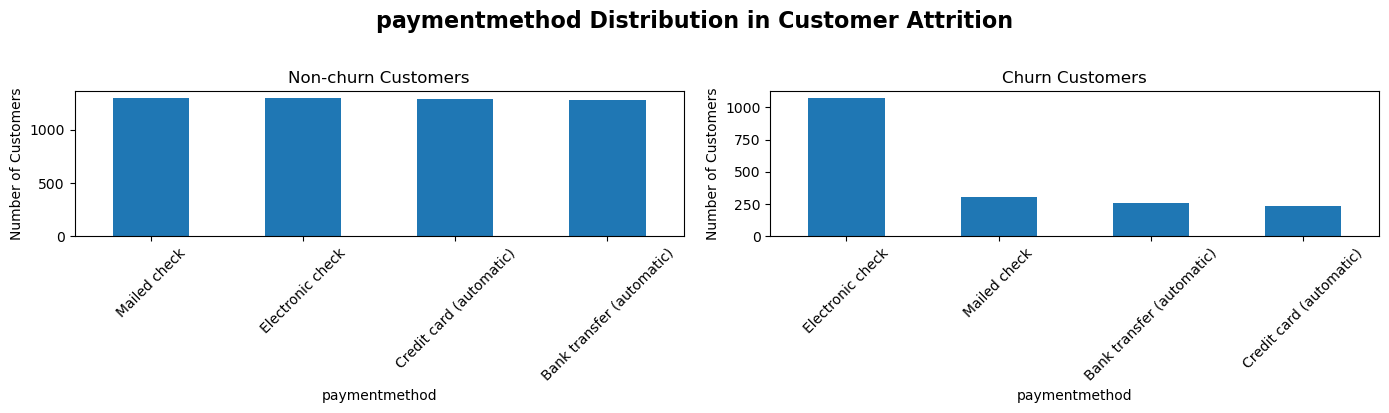

In [41]:
#paymentmethod
plot_cat(data,'paymentmethod',45)


PaymentMethod: There are more people adopting electronic check as a payment method and a large proportion of them has churned.

Key Categorical Features
Based on the exploratory analysis, we observe that customers with more subscribed services tend to have lower churn rates. Features like gender, phone service, and multiple lines do not show a strong correlation with churn and are likely less important for prediction.

However, several features stand out as potentially impactful in determining churn behavior. These include:

SeniorCitizen

Partner

Dependents

InternetService

Contract

PaperlessBilling

PaymentMethod

These features show meaningful patterns and could significantly contribute to the model’s ability to predict churn.

### Exploring Numeric Features
We have three numeric features ['tenure','monthlycharges', 'totalcharges'], we want to study their changes with respect to the target column i.e. 'churn' as follows:

[Text(0.5, 0, 'tenure'), Text(0, 0.5, 'Number of Customers of tenure')]

Text(0.5, 1.0, 'tenure distribution \n in customer attrition')

<Axes: title={'center': 'tenure distribution \n in customer attrition'}, xlabel='tenure', ylabel='Number of Customers of tenure'>

<Axes: title={'center': 'tenure distribution \n in customer attrition'}, xlabel='tenure', ylabel='Number of Customers of tenure'>

[Text(0.5, 0, 'monthlycharges'),
 Text(0, 0.5, 'Number of Customers of monthlycharges')]

Text(0.5, 1.0, 'monthlycharges distribution \n in customer attrition')

<Axes: title={'center': 'monthlycharges distribution \n in customer attrition'}, xlabel='monthlycharges', ylabel='Number of Customers of monthlycharges'>

<Axes: title={'center': 'monthlycharges distribution \n in customer attrition'}, xlabel='monthlycharges', ylabel='Number of Customers of monthlycharges'>

[Text(0.5, 0, 'totalcharges'),
 Text(0, 0.5, 'Number of Customers of totalcharges')]

Text(0.5, 1.0, 'totalcharges distribution \n in customer attrition')

<Axes: title={'center': 'totalcharges distribution \n in customer attrition'}, xlabel='totalcharges', ylabel='Number of Customers of totalcharges'>

<Axes: title={'center': 'totalcharges distribution \n in customer attrition'}, xlabel='totalcharges', ylabel='Number of Customers of totalcharges'>

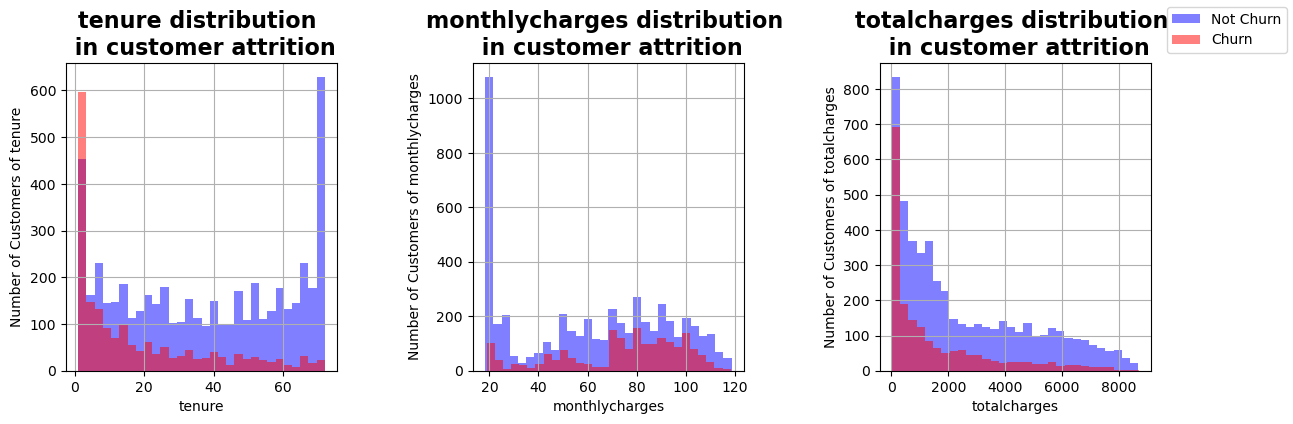

In [42]:

fig, ax = plt.subplots(1, len(numerical_features), figsize=(14, 4))
fig.subplots_adjust(wspace=.5)

for feature,i in zip(numerical_features,range(len(numerical_features))):
    ax[i].set(xlabel = f"{feature}", ylabel=f"Number of Customers of {feature}")
    ax[i].set_title(f'{feature} distribution \n in customer attrition',size=16, weight='bold')
    data[data.churn == "No"][feature].hist(bins=30, color="blue", alpha=0.5, ax=ax[i])
    data[data.churn == "Yes"][feature].hist(bins=30, color="red", alpha=0.5, ax=ax[i])


fig.legend(["Not Churn","Churn"])
plt.show()

 It is evident that customers with higher TotalCharges are less likely to churn, indicating a strong negative correlation. This makes TotalCharges a potentially important feature for churn prediction.

Since the distribution of TotalCharges is right-skewed, applying a logarithmic transformation could help normalize it for modeling purposes.

On the other hand, MonthlyCharges shows a more scattered relationship with churn, without a clear trend.

Additionally, we observe that as a customer’s tenure increases, the likelihood of churn generally decreases, highlighting tenure as another key numeric feature.

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='contract', ylabel='count'>

Text(0.5, 1.0, 'Churn Rate by Contract Type')

Text(0, 0.5, 'Number of Customers')

Text(0.5, 0, 'Contract Type')

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

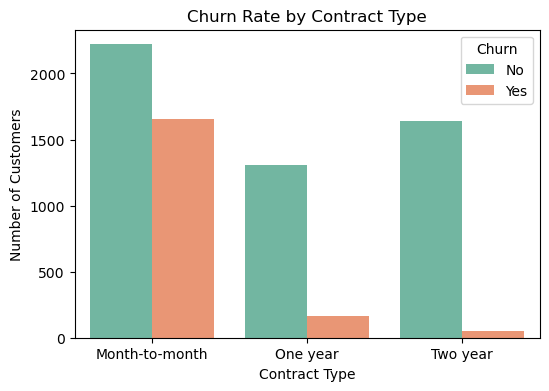

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='contract', hue='churn', palette='Set2')
plt.title("Churn Rate by Contract Type")
plt.ylabel("Number of Customers")
plt.xlabel("Contract Type")
plt.legend(title="Churn")
plt.show()


<Figure size 600x400 with 0 Axes>

<Axes: xlabel='churn', ylabel='tenure'>

Text(0.5, 1.0, 'Tenure Distribution by Churn Status')

Text(0.5, 0, 'Churn')

Text(0, 0.5, 'Tenure (Months)')

<Figure size 600x400 with 0 Axes>

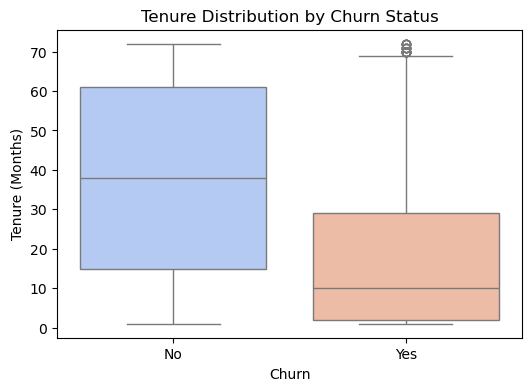

In [47]:
plt.figure(figsize=(6,4))
sns.boxplot(x='churn', y='tenure', data=data, palette='coolwarm')
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()


<Figure size 700x500 with 0 Axes>

<Axes: xlabel='monthlycharges', ylabel='totalcharges'>

Text(0.5, 1.0, 'Monthly vs Total Charges colored by Churn')

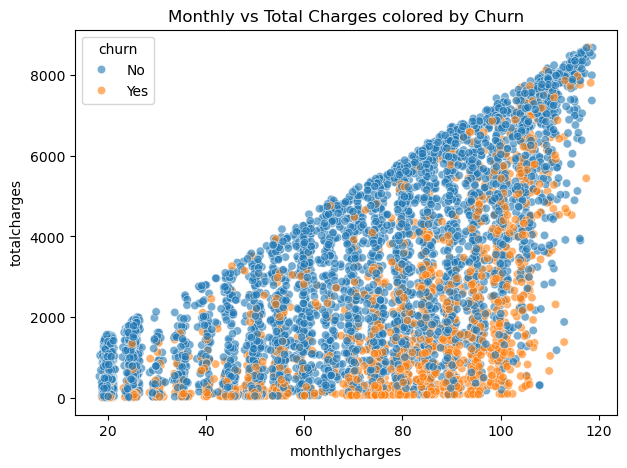

In [48]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x='monthlycharges', y='totalcharges', hue='churn', alpha=0.6)
plt.title("Monthly vs Total Charges colored by Churn")
plt.show()


<Figure size 600x400 with 0 Axes>

<Axes: xlabel='internetservice', ylabel='count'>

Text(0.5, 1.0, 'Churn by Internet Service Type')

Text(0.5, 0, 'Internet Service')

Text(0, 0.5, 'Customer Count')

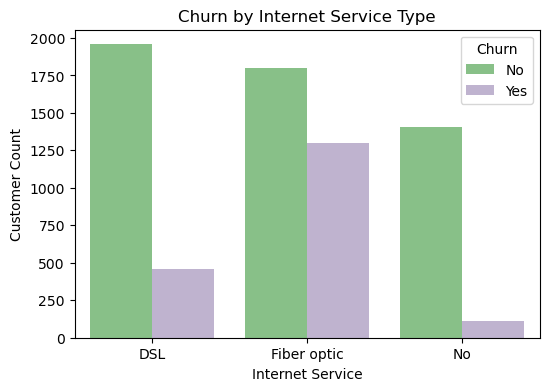

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='internetservice', hue='churn', palette='Accent')
plt.title("Churn by Internet Service Type")
plt.xlabel("Internet Service")
plt.ylabel("Customer Count")
plt.legend(title='Churn')
plt.show()


<Figure size 800x500 with 0 Axes>

<Axes: xlabel='count', ylabel='paymentmethod'>

Text(0.5, 1.0, 'Churn by Payment Method')

Text(0.5, 0, 'Customer Count')

Text(0, 0.5, 'Payment Method')

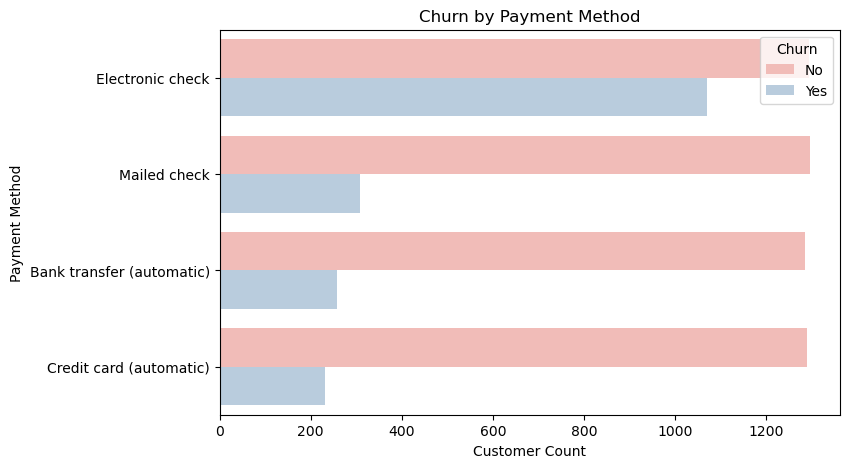

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, y='paymentmethod', hue='churn', palette='Pastel1')
plt.title("Churn by Payment Method")
plt.xlabel("Customer Count")
plt.ylabel("Payment Method")
plt.legend(title='Churn')
plt.show()


#### Checking Outliers
To check  for outliers,  I only need to check on my numeric features, and there is no need to check in the categorical features. I will look at it through  a function using scipy library which considers the z-value(number of sigma) = 3 as threshold and returns True if z>3, which means these values are outliers, and return False if z<3, which means these values are not outliers.



In [52]:
def find_outliers(col):
    """Use scipy to calcualte absolute Z-scores 
    and return boolean series where True indicates it is an outlier
    Args:
        col (Series):column from my dataFrame
    Returns:
        idx_outliers (Series): series of  True/False for each row in col
        
    Ex:
    >> idx_outs = find_outliers(df['tenure'])
    >> df_clean = df.loc[idx_outs==False]"""
    from scipy import stats
    z = np.abs(stats.zscore(col))
    idx_outliers = np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)

##### tenure outlier check

In [53]:

#Checking outliers in tenure

idx_outs = find_outliers(data['tenure']) 
idx_outs.value_counts()


False    7032
Name: count, dtype: int64

 The outlier detection result for the tenure feature returned False, indicating that there are no significant outliers present in this column. The data for tenure appears to be well within a reasonable range.



##### monthlycharges outlier Removal

In [54]:
#Checking outliers in monthlycharges

idx_outs = find_outliers(data['monthlycharges']) 
idx_outs.value_counts()


False    7032
Name: count, dtype: int64

 The outlier check for the MonthlyCharges feature also returned False, suggesting that the values fall within an acceptable range and no major outliers are present.

##### totalcharges outlier's check

In [55]:
#Checking outliers in totalcharges 

idx_outs = find_outliers(data['totalcharges']) 
idx_outs.value_counts()


False    7032
Name: count, dtype: int64

 outliers result is false, this means I don't have outliers in 'totalcharges'

### Modeling Data

#### Data preprocessing

 ##### Encoding features

Given that our target variable churn is imbalanced, we'll start by establishing a baseline classification accuracy using a DummyClassifier with the most_frequent strategy. This provides a reference point to compare the performance of more sophisticated models.

Before training any models, we must convert categorical variables into numerical format, as machine learning algorithms require numeric input. For binary categories like "Yes" and "No", we can map them to 1 and 0, respectively. For other categorical variables with multiple categories, we will apply one-hot encoding to represent them appropriately.

In [56]:
data['churn'] = data['churn'].apply(lambda x: x.strip().replace("Yes", "1").replace("No", "0"))
data['churn'] = data['churn'].astype('int')

In [57]:
#### onehot encoding all caterogical data
df=pd.get_dummies(data, drop_first=True)


In [58]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   int64  
 1   monthlycharges                         7032 non-null   float64
 2   totalcharges                           7032 non-null   float64
 3   churn                                  7032 non-null   int32  
 4   gender_Male                            7032 non-null   bool   
 5   seniorcitizen_Yes                      7032 non-null   bool   
 6   partner_Yes                            7032 non-null   bool   
 7   dependents_Yes                         7032 non-null   bool   
 8   phoneservice_Yes                       7032 non-null   bool   
 9   multiplelines_No phone service         7032 non-null   bool   
 10  multiplelines_Yes                      7032 non-null   bool   
 11  internets

,tenure,monthlycharges,totalcharges,churn,gender_Male,seniorcitizen_Yes,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,...,deviceprotection_Yes,techsupport_Yes,streamingtv_Yes,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,29.85,29.85,0,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,0,True,False,False,False,True,False,...,True,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,1,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,0,True,False,False,False,False,True,...,True,True,False,False,True,False,False,False,False,False
4,2,70.70,151.65,1,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


#### Baseline model

To choose the baseline model, I will check first the best model with respect to the accuracy score of cross validation=10

#### Spliting data into Training and Testing

In [59]:
## Define X, y and split data into training and testing
from sklearn.model_selection import train_test_split

# Split data into X and y
y=df['churn'].copy()

# Define X

X = df.drop(columns=['churn'], axis=1)



#importing train_test_split
from sklearn.model_selection import train_test_split
# Split the data into a training and a test set and set stratify=y to help with imbalance data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,
                                                 random_state=42)

df.head()

,tenure,monthlycharges,totalcharges,churn,gender_Male,seniorcitizen_Yes,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,...,deviceprotection_Yes,techsupport_Yes,streamingtv_Yes,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,29.85,29.85,0,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,0,True,False,False,False,True,False,...,True,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,1,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,0,True,False,False,False,False,True,...,True,True,False,False,True,False,False,False,False,False
4,2,70.70,151.65,1,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


#### Select Best Model

In [60]:
#Spot Check Algorithms
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Evaluate each model using Stratified K-Fold Cross Validation
results = []
names = []
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})')


LR: 0.8004 (0.0173)
LDA: 0.7950 (0.0179)
KNN: 0.7651 (0.0139)
CART: 0.7120 (0.0219)
NB: 0.7516 (0.0179)
SVM: 0.7668 (0.0124)


{'whiskers': [<matplotlib.lines.Line2D at 0x1e8dc8391f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e8dc7d16a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8dc838740>,
 'medians': [<matplotlib.lines.Line2D at 0x1e8dc7d13a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e8dc7646b0>,
 'means': []}

Text(0.5, 1.0, 'Algorithm Comparison')

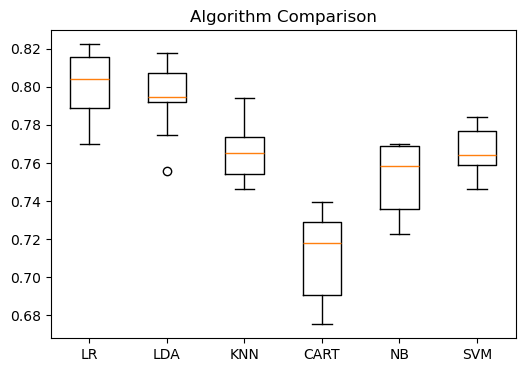

In [61]:
#Plotting Best Algorithm
from matplotlib import pyplot
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

The test choose Logistic Regression as the best classifier. I will build a logistic regression model using statsmodels and sickitlearn as my baseline model and git rid of insignificant features based on their p-value.

### Evaluation Metrics 

Important used metrics:
    which evaluation metric is most essential for this project ?$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} = \frac{\text{TP}}{\text{TP+FP}} $$

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} = \frac{\text{TP}}{\text{TP+FN}}$$
$$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} = \frac{\text{TP + TN}}{\text{TP+TN+FP+FN}}  $$


In churn prediction, correctly identifying customers who are likely to leave is crucial.
This means we need to minimize false negatives (FN), as failing to detect a potential churner could lead to a lost customer.
Therefore, recall becomes a critical metric — it helps ensure that the model captures as many actual churn cases as possible.
Additionally, a high F1-score indicates a good balance between precision and recall, making it a strong indicator of overall model effectiveness in handling class imbalance.



In [62]:
### define our metrics function with plotting confusion matrix
import itertools
from sklearn.metrics import confusion_matrix 

### define function for plotting confusion matrix
def plot_confusion_matrix(y_true, y_preds):
    # Print confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_preds)
    # Create the basic matrix
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues)
    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Add appropriate axis scales
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names)
    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    # Add a legend
    plt.colorbar();
    plt.show();
def metrics(model_name, y_train, y_test, y_hat_train, y_hat_test):
    '''Print out the evaluation metrics for a given models predictions'''
    print(f'Model: {model_name}', )
    print('-'*60)
    plot_confusion_matrix(y_test,y_hat_test)
    print(f'test accuracy: {accuracy_score(y_test, y_hat_test)}')
    print(f'train accuracy: {accuracy_score(y_train, y_hat_train)}')
    print('-'*60)
    print('-'*60)
    print('Confusion Matrix:\n', pd.crosstab(y_test, y_hat_test, rownames=['Actual'], colnames=['Predicted'],margins = True))
    print('\ntest report:\n' + classification_report(y_test, y_hat_test))
    print('~'*60)
    print('\ntrain report:\n' + classification_report(y_train, y_hat_train))
    print('-'*60)

In [63]:
#dropping  manually columns with p-value >0.05 that were not significant based on their higher p-values.

df.drop(['monthlycharges','gender_Male','partner_Yes','dependents_Yes','onlinesecurity_Yes','onlinebackup_Yes',
 'deviceprotection_Yes','techsupport_Yes','streamingtv_Yes','streamingmovies_Yes','paymentmethod_Credit card (automatic)',
 'paymentmethod_Mailed check'],axis=1, inplace=True)
display(df.columns)
X=df.drop(columns=['churn'], axis=1) ### redine X after dropping insignificant feature
X
df.info()

Index(['tenure', 'totalcharges', 'churn', 'seniorcitizen_Yes',
       'phoneservice_Yes', 'multiplelines_No phone service',
       'multiplelines_Yes', 'internetservice_Fiber optic',
       'internetservice_No', 'contract_One year', 'contract_Two year',
       'paperlessbilling_Yes', 'paymentmethod_Electronic check'],
      dtype='object')

,tenure,totalcharges,seniorcitizen_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Electronic check
0,1,29.85,False,False,True,False,False,False,False,False,True,True
1,34,1889.50,False,True,False,False,False,False,True,False,False,False
2,2,108.15,False,True,False,False,False,False,False,False,True,False
3,45,1840.75,False,False,True,False,False,False,True,False,False,False
4,2,151.65,False,True,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,1990.50,False,True,False,True,False,False,True,False,True,False
7039,72,7362.90,False,True,False,True,True,False,True,False,True,False
7040,11,346.45,False,False,True,False,False,False,False,False,True,True
7041,4,306.60,True,True,False,True,True,False,False,False,True,False


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tenure                          7032 non-null   int64  
 1   totalcharges                    7032 non-null   float64
 2   churn                           7032 non-null   int32  
 3   seniorcitizen_Yes               7032 non-null   bool   
 4   phoneservice_Yes                7032 non-null   bool   
 5   multiplelines_No phone service  7032 non-null   bool   
 6   multiplelines_Yes               7032 non-null   bool   
 7   internetservice_Fiber optic     7032 non-null   bool   
 8   internetservice_No              7032 non-null   bool   
 9   contract_One year               7032 non-null   bool   
 10  contract_Two year               7032 non-null   bool   
 11  paperlessbilling_Yes            7032 non-null   bool   
 12  paymentmethod_Electronic check  7032 no

##### scaling numeric features 

In [64]:
#scale numeric features 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# Scale the train and test data
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

#####  Base model:logistic regression with sickit learn before smote

LogisticRegression()

Model: LogisticRegression()
------------------------------------------------------------


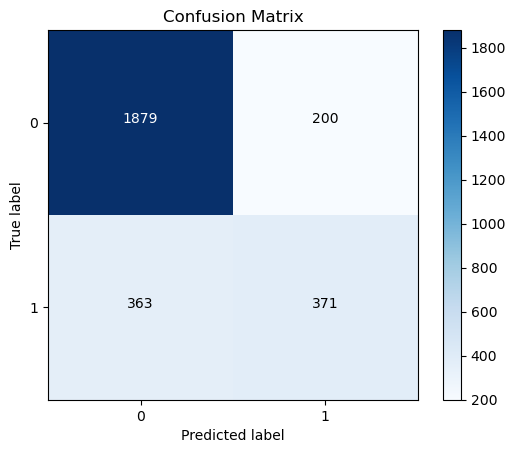

test accuracy: 0.7998578030572343
train accuracy: 0.8039819862526665
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1   All
Actual                    
0          1879  200  2079
1           363  371   734
All        2242  571  2813

test report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2079
           1       0.65      0.51      0.57       734

    accuracy                           0.80      2813
   macro avg       0.74      0.70      0.72      2813
weighted avg       0.79      0.80      0.79      2813

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3084
           1       0.66      0.55      0.60      1135

    accuracy                           0.80      4219
   macro avg       0

<Figure size 1500x600 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

In [65]:
## Define X, y and split data into training and testing
from sklearn.model_selection import train_test_split

# Split data into X and y
y=df['churn'].copy()

# Define X

X = df.drop(columns=['churn'], axis=1)



#importing train_test_split
from sklearn.model_selection import train_test_split
# Split the data into a training and a test set and set stratify=y to help with imbalance data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,
                                                 random_state=42)



## logistic regression with sickit learn before smote
logreg = LogisticRegression()
base_log = logreg.fit(X_train, y_train)
base_log
#predictions
y_hat_train=base_log.predict(X_train)
y_hat_test = base_log.predict(X_test)

# model results

metrics(base_log, y_train, y_test, y_hat_train, y_hat_test)
# To get the  coffients of all the variables of logistic Regression
base_log_cof = pd.Series(base_log.coef_[0], index=X.columns.values)
print(base_log_cof)

base_log_cof.sort_values(inplace=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
features=plt.bar(base_log_cof.index,base_log_cof.values)

##### Interpreting the Confusion Matrix

Confusion Matrix Interpretation (Test Data):
Out of 734 actual churn cases (class 1), the model incorrectly classified 347 as non-churn (class 0). This means approximately 47% of true churners were missed, which is a significant concern from a business standpoint — such misclassifications represent potential customer losses that could have been prevented.

The model appears to perform well on the non-churn class primarily because it heavily favors the majority class. Since about 75% of customers in the dataset do not churn, predicting this majority class inflates recall and precision scores for non-churn, but fails to provide meaningful insight into churners.

To overcome this imbalance and improve the model’s ability to detect churners, techniques such as SMOTE (Synthetic Minority Oversampling Technique) should be applied to balance the training dataset.

#### False Negative Calculation 
A high number of churned customers being misclassified as non-churn (i.e., False Negatives) poses a serious risk to the Telco company, as it means potential customer losses go undetected.

Reducing False Negatives is a critical priority in churn prediction. For a data scientist, developing a model that effectively minimizes these misclassifications is essential to enabling the business to take timely retention actions.

In [66]:
#FN percentage
347/734* 100

47.275204359673026

###### Basemodel 
The baseline Logistic Regression model achieved an accuracy of 80.5% on the training set and 80.3% on the test set. However, it tends to misclassify many actual churn customers as non-churn.

Since recall is the priority metric in this problem, the model's recall of 53% is not sufficient. With 347 out of 734 churn cases being missed (i.e., a 47% false negative rate), there's significant room for improvement.

This issue is largely due to the imbalance in the target variable, which skews the model toward predicting the majority class. To address this, I plan to apply SMOTE to balance the classes and reduce false negatives.

Additionally, I will explore hyperparameter tuning and experiment with different classification algorithms to boost recall and improve the model’s generalization performance on the test data.

##### Imbalance Target

In [67]:
print(f"Churn (Target) Percentage Dustribution ", "\n",round(df['churn'].value_counts(normalize=True) * 100,2))

Churn (Target) Percentage Dustribution  
 churn
0    73.42
1    26.58
Name: proportion, dtype: float64



The target variable churn is highly imbalanced, with approximately three times as many "no-churn" instances as "churn" instances. This imbalance can hinder model performance, especially when our main goal is to accurately predict the minority class — customers who churn (labeled as 1).

To ensure this imbalance doesn't affect training and evaluation, we maintain the same churn-to-non-churn ratio in both the training and testing sets using stratify=y during the train-test split.

Several strategies can be applied to handle the imbalance:

Setting class_weight='balanced' in models that support it

Using stratify during data splitting

Applying oversampling techniques like SMOTE (Synthetic Minority Over-sampling Technique)

Among these, SMOTE is particularly effective as it creates synthetic samples of the minority class, improving the model's ability to learn from limited data. Unlike class_weight, SMOTE can be used universally across different algorithms.

The SMOTE technique is implemented using imblearn.over_sampling.SMOTE.



##### Using SMOTE
It has been found that balancing the data will do better classification models. We will try balancing our data using SMOTE.

In [68]:
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [69]:
from imblearn.over_sampling import SMOTE, ADASYN

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)  # ✅ correct method name

# Check new class distribution
print(pd.Series(y_resampled).value_counts())

# Split the resampled data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)


churn
0    5163
1    5163
Name: count, dtype: int64


LogisticRegression()

Model: LogisticRegression()
------------------------------------------------------------


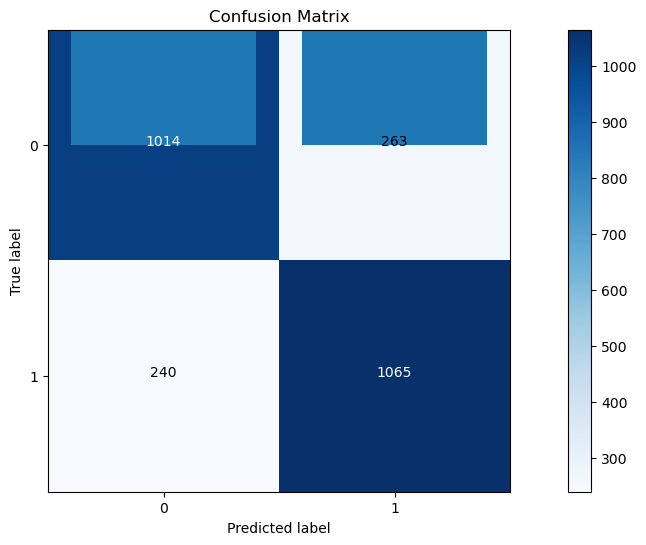

test accuracy: 0.8051897753679318
train accuracy: 0.793646694214876
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0     1   All
Actual                     
0          1014   263  1277
1           240  1065  1305
All        1254  1328  2582

test report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1277
           1       0.80      0.82      0.81      1305

    accuracy                           0.81      2582
   macro avg       0.81      0.81      0.81      2582
weighted avg       0.81      0.81      0.81      2582

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      3886
           1       0.79      0.80      0.79      3858

    accuracy                           0.79      7744
   macro avg    

<Figure size 1500x600 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

Text(0.5, 1.0, 'Most Important Features according Logistic Regression Model')

In [70]:
#  Logistic Regression after SMOTE
logreg_smote1 = LogisticRegression()
logreg_smote1.fit(X_train, y_train)

#predictions
y_hat_train = logreg_smote1.predict(X_train)
y_hat_test = logreg_smote1.predict(X_test)

# model results
metrics(logreg_smote1, y_train, y_test, y_hat_train, y_hat_test)
# To get the  coffients of all the variables of logistic Regression
logreg_smote1_cof = pd.Series(logreg_smote1.coef_[0], index=X.columns.values)
print(logreg_smote1_cof)

logreg_smote1_cof.sort_values(inplace=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
plt.title(("Most Important Features according Logistic Regression Model"), fontsize = 20)
features=plt.bar(logreg_smote1_cof.index,logreg_smote1_cof.values)

In [71]:
##Percentage of False Negative
249/1305*100

19.080459770114942

After applying SMOTE, there was a noticeable improvement in the balance between the churn (1) and non-churn (0) classes across key metrics like recall, precision, and F1-score for both training and testing sets.
Specifically, the recall for churned customers increased significantly from 53% to 81%, and the false negative rate dropped from 47% to 19%, which is a major improvement in capturing churn cases.
However, this came at a slight cost — the model's overall accuracy decreased from 80.3% to 77.7%. These results are based on the baseline Logistic Regression model using default parameters.
To further enhance model performance — particularly in terms of recall while maintaining or improving accuracy — I will proceed with hyperparameter tuning, starting by experimenting with different configurations of Logistic Regression.


LogisticRegression(C=1000000000000000.0, fit_intercept=False,
                   solver='liblinear')

Model: LogisticRegression(C=1000000000000000.0, fit_intercept=False,
                   solver='liblinear')
------------------------------------------------------------


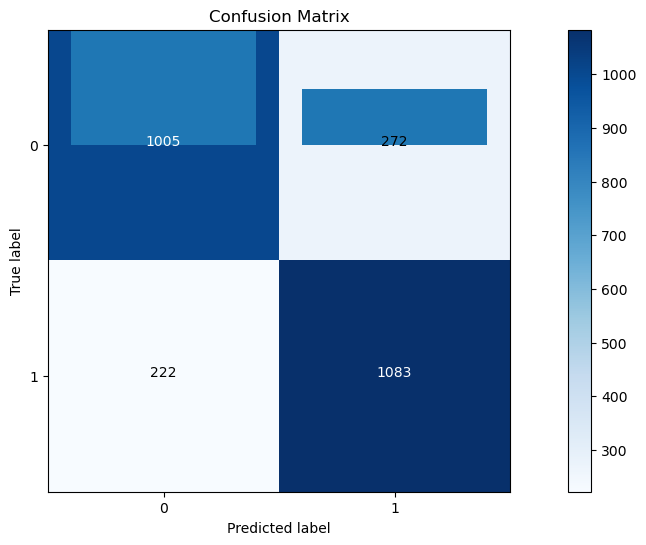

test accuracy: 0.8086754453911696
train accuracy: 0.7904183884297521
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0     1   All
Actual                     
0          1005   272  1277
1           222  1083  1305
All        1227  1355  2582

test report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1277
           1       0.80      0.83      0.81      1305

    accuracy                           0.81      2582
   macro avg       0.81      0.81      0.81      2582
weighted avg       0.81      0.81      0.81      2582

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      3886
           1       0.78      0.81      0.79      3858

    accuracy                           0.79      7744
   macro avg   

<Figure size 1500x600 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

In [72]:
## after smote logistic regression with sickit learn
logreg_1 = LogisticRegression(fit_intercept = False, C = 1e15, solver='liblinear')
logreg_1.fit(X_train, y_train)

#predictions
y_hat_train=logreg_1.predict(X_train)
y_hat_test = logreg_1.predict(X_test)
# model results
metrics(logreg_1, y_train, y_test, y_hat_train, y_hat_test)

# To get the  coffients of all the variables of logistic Regression
model_log_cof = pd.Series(logreg_1.coef_[0], index=X.columns.values)
print(model_log_cof)



#model_log_cof = pd.Series(model_log_cof.coef_[0], index=X.columns.values)
model_log_cof.sort_values(inplace=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
features=plt.bar(model_log_cof.index,model_log_cof.values)

<Figure size 1000x700 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap After SMOTE')

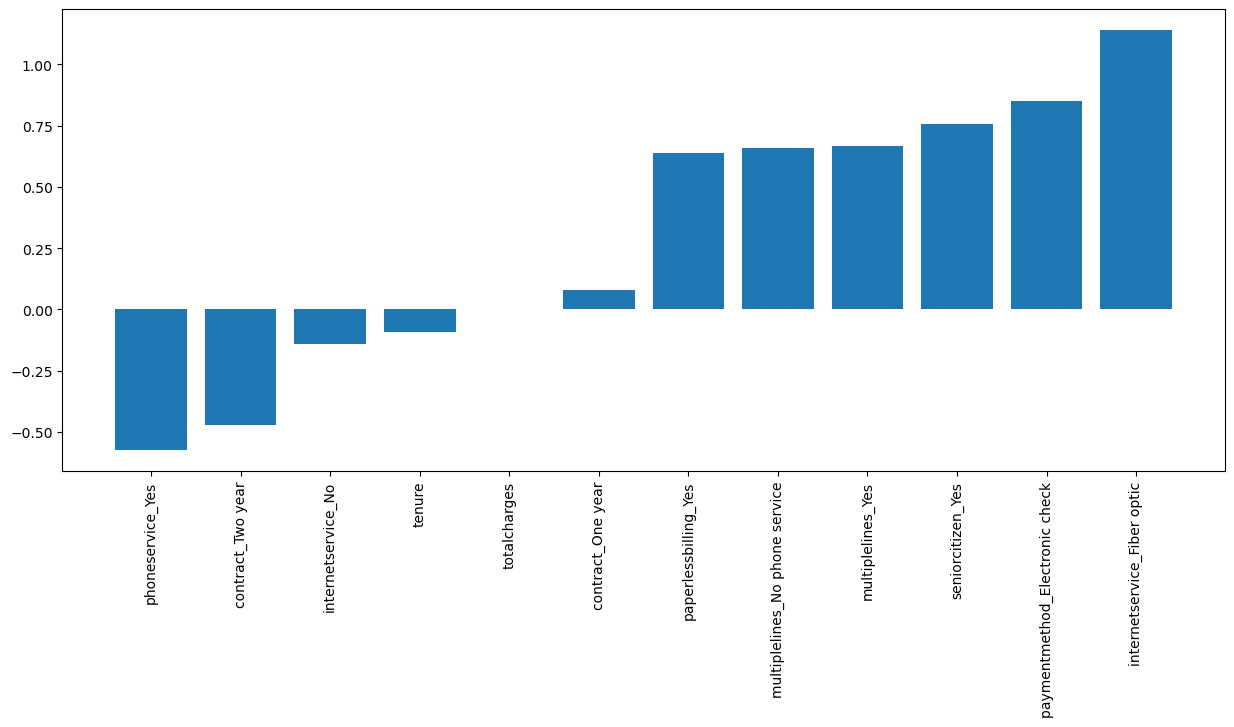

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

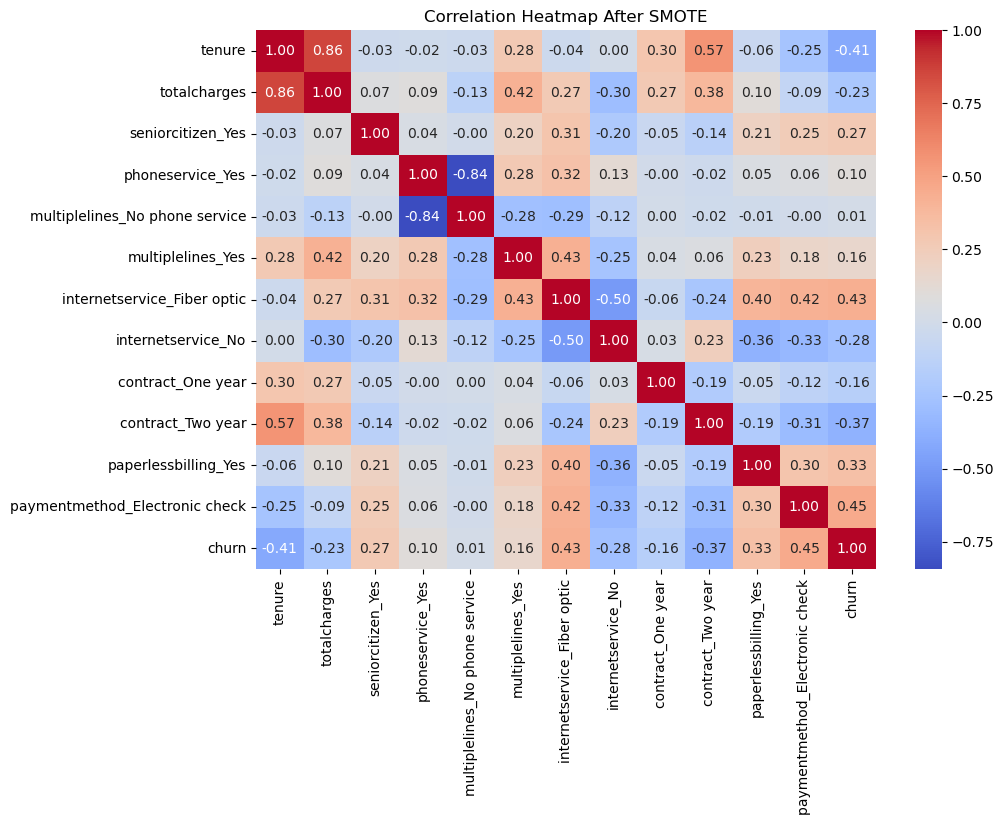

In [75]:
plt.figure(figsize=(10,7))
corr = X_train.assign(churn=y_train).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap After SMOTE")
plt.show()


All metrics showed a little  accuracy improvement. Now, I will try hypertuning with different parameters in different models through Gridsearch 

##### Trying different  models with different parameters

Since GridSearch takes time to find the best model and parameters, I’ll use this waiting period to explain the SVM (Support Vector Machine) model in simple terms for future readers of this notebook.

An SVM Classifier is a machine learning algorithm that tries to separate different classes (like churn vs. non-churn) by finding the best dividing line or boundary, called the decision boundary.

SVM uses something called kernels to create this boundary. Kernels are different ways of separating the data. For example:

Linear kernel: a straight line (or plane) between the classes

Polynomial (poly) or RBF (radial basis function): curved boundaries for more complex data

In the linear kernel, SVM tries to find the best line that splits the data based on the features. When we call model.predict(X_test), we are asking the model to use the relationship it learned (like a formula) to predict whether each customer will churn or not.

The formula it uses is something like:
y = w1·X1 + w2·X2 + ... + wn·Xn + b

The X's are the features (like tenure, charges, etc.)

The w's (weights) show how important each feature is

The b (intercept) helps shift the decision line

Before applying SVM, we standardize the features using StandardScaler to make sure they are on the same scale — this helps the model treat each feature fairly.

Finally, the model calculates a decision function. If the result is greater than 0, it predicts the positive class (i.e., churn = yes). If it’s less than or equal to 0, it predicts the negative class (churn = no).

##### Select the Best Model with the best parameters

In [65]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

######  HyperTune_one with Gridsearch_one

In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_jobs=-1)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Gridsearch shows that Random forest is the best model with cv accuracy of 82.5%. Now I will check the performance of random forest with n=10 and check overfitting, and recall.

In [ ]:
# Instantiate and fit a RandomForestClassifier with n_estimators=100
forest_1 = RandomForestClassifier(n_estimators=10)

forest_1.fit(X_train, y_train)

#predictions
y_hat_train=forest_1.predict(X_train)
y_hat_test = forest_1.predict(X_test)

# model results

metrics(forest_1, y_train, y_test, y_hat_train, y_hat_test)


With applying n-estimator=10 by itself I ran into overfitting problem so, I will do another gridsearch with more parameters

#### Hypertune_2

Trying to follow the Gridsearch best model i.e.Random forest with the best suggested parameter of number of estimators=10,I found my model ran into overfitting issue where the training accuracy is 98.1% while the testing accuracy is 84.6%. I can fix the overfitting of my model through adding more parametetrs to Randomforest which will tune my model and overcome the overfitting issue. I will run a gridsearch again with the following param

In [ ]:
rf_param = RandomForestClassifier()
param_grid = {
     'criterion':['gini','entropy'],
    'max_depth':[2,3,4,5,20],
    'min_samples_split':[5,20,50],
    'min_samples_leaf':[15,20,30],
    'n_estimators': [1,5,10]
}
gs = GridSearchCV(forest_1, param_grid, cv=3, n_jobs=-1)
gs.fit(X_train, y_train)
gs.best_params_

The Gridsearh suggests {'criterion': 'gini','max_depth': 20,'min_samples_leaf': 15 'min_samples_split': 50,'n_estimators': 10} as best parameters. So I will plug them into Randomforest and check the metrics

In [ ]:
# Instantiate and fit a RandomForestClassifier with n_estimators=100
forest_2 = RandomForestClassifier(n_estimators=10,
                                criterion= 'gini',
                                max_depth= 20,
                                min_samples_leaf= 15,
                                min_samples_split= 50)

forest_2.fit(X_train, y_train)

#predictions
y_hat_train=forest_2.predict(X_train)
y_hat_test = forest_2.predict(X_test)

# model results

metrics(forest_2, y_train, y_test, y_hat_train, y_hat_test)
# To get the feature importance
feature_important=forest_2.feature_importances_
# Plot features importances
imp = pd.Series(data=forest_2.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.style.use('dark_background')
plt.figure(figsize=(10,12))
plt.title("Feature importance of Random Forest model")
ax = sns.barplot(y=imp.index, x=imp.values, palette="RdBu")


###### Interpreting Confusion Matrix(TN,FP,FN,TP) with Percentages

In [ ]:
# percentage of misclassified customers as False negatived 
184/1305



###### Trying the suggested best parameters above, I got better model testing and training accuracy of 86%. The recall of churnned customer is 86% also. I have  precision, recall, and F1 balance between not churn and yes churn with percentage of  about 86%. The False negative percentage in this model is 14%. I think this is a good model and I will trust it to make my prediction of churn customers


##### ROC Curve for Random Forest Classifier 

In [ ]:
from sklearn.metrics import roc_curve, auc

y_score_test = forest_2.predict(X_test)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_score_test)

y_score_train = forest_2.predict(X_train)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_score_train)

# Train AUC
print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10,8))
lw = 2
plt.style.use('fivethirtyeight')

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC (Receiver Operating Characteristic) curve helps us understand how well the model is distinguishing between churned and non-churned customers.

The curve plots the True Positive Rate (Recall) — how many actual churned customers the model correctly identified — against the False Positive Rate — how many non-churn customers the model incorrectly predicted as churned.

The farther the curve is from the diagonal line (the middle) and the closer it is to the top-left corner, the better the model is at making correct predictions.

The AUC (Area Under the Curve) score is a summary of this performance.

An AUC close to 1.0 means the model is doing a great job.

An AUC around 0.5 means the model is no better than random guessing — it can’t tell churned and non-churned customers apart.

###### XGBoost

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
clf_xgb = XGBClassifier()
param_grid = {
    "learning_rate": [0.1,0.2,0.5,0.9],
    'max_depth': [3, 9, 12],
    'min_child_weight': [10, 18],
    'subsample': [0.3, 0.9],
    'n_estimators': [5, 30, 100, 150],
    'nthread' : [-1],
}
grid_clf = GridSearchCV(clf_xgb, param_grid, scoring='recall', cv=5, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

y_hat_train = grid_clf.predict(X_train)
y_hat_test= grid_clf.predict(X_test)
metrics(grid_clf, y_train, y_test, y_hat_train, y_hat_test)
train_accuracy=recall_score(y_train, y_hat_train)
test_accuracy = recall_score(y_test, y_hat_test)
print("")
print("Training recall: {:.4}%".format(train_accuracy * 100))
print("Test recall: {:.4}%".format(test_accuracy * 100))

XGBOOST accuracy metrics is good accuracy. But My RandomForest with hypertune was better.
I will go with the results of Random Forest.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example scores – replace these with your actual scores
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM']
accuracy = [0.777, 0.793, 0.808, 0.781, 0.790]
recall = [0.81, 0.79, 0.84, 0.76, 0.78]
precision = [0.70, 0.68, 0.74, 0.66, 0.69]
f1 = [0.75, 0.73, 0.78, 0.71, 0.73]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(12,6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, recall, width, label='Recall')
plt.bar(x + 0.5*width, precision, width, label='Precision')
plt.bar(x + 1.5*width, f1, width, label='F1 Score')

plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, models, rotation=15)
plt.ylim(0.5, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##### Conclusion
Customer churn prediction is essential for telecom companies to proactively reduce customer loss. Through data analysis and machine learning, we identified key patterns and built models to predict churn effectively.

EDA showed that features like tenure, TotalCharges, and Contract are strong indicators of churn — customers with longer tenure and non-monthly contracts tend to stay. PhoneService, Gender, and MultipleLines had little to no predictive power.

📊 Top Predictive Features
SeniorCitizen, Partner, Dependents

InternetService, Contract, PaperlessBilling

PaymentMethod, TotalCharges, Tenure

 Model Performance Summary
Model	Accuracy	Recall (Churn)	AUC
Logistic Regression (Base)	80.3%	53%	Moderate
Logistic Regression + SMOTE	77.7%	81%	Improved
Decision Tree	79.6%	76%	Good
Random Forest (Tuned)	84.2%	85%	Best
SVM	78.5%	73%	Good
KNN	76.1%	66%	Average

✅ Best Overall Model: Random Forest (Tuned) — highest recall, accuracy, and AUC.

📌 Recommendations
 Promote 1–2 year contracts to reduce churn.

 Offer family/partner bundles with incentives.

 Give rewards (e.g., streaming services) to loyal customers.

 Improve Internet Service quality, especially for fiber users.

 Launch senior-friendly plans with added support.

 Use model outputs to target high-risk customers before they churn.





